<a href="https://colab.research.google.com/github/leks360/prediction-of-injuries-in-mines/blob/main/INJURIES_IN_MINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
import io
from __future__ import absolute_import, division, print_function
import pathlib
import io
import seaborn as sns
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [291]:
from google.colab import files

uploaded = files.upload()


Saving mine_data.csv to mine_data (4).csv


In [333]:
copy=uploaded.copy()
uploaded=copy

In [334]:
data_set=pd.read_csv(io.StringIO(uploaded['mine_data.csv'].decode('utf-8')))

In [335]:
data_set.head()

,total_injuries,total_hours,total_hours_prev,central_appalachia,inspection_rate_prev,total_injuries_prev,traum_injuries_prev,accidents_rate_prev,onsite_hours_prev,mine_type,mean_bed_thickness,east,total_employees_prev
0,1,0.62371,0.640217,no,0.000556,4.00,1.75,6.244650,25.8750,M,0.0,yes,108.00
1,1,0.13720,0.157330,no,0.001114,0.75,0.50,4.788316,7.8750,M,0.0,yes,26.75
2,0,0.06074,0.062967,no,0.001940,0.00,0.00,0.000000,7.1875,M,0.0,yes,12.00
3,1,0.26570,0.260943,no,0.000445,1.50,0.75,5.647860,7.8125,M,0.0,yes,39.50
4,0,0.07968,0.092463,no,0.002394,0.00,0.00,0.000000,16.8125,M,0.0,yes,19.25


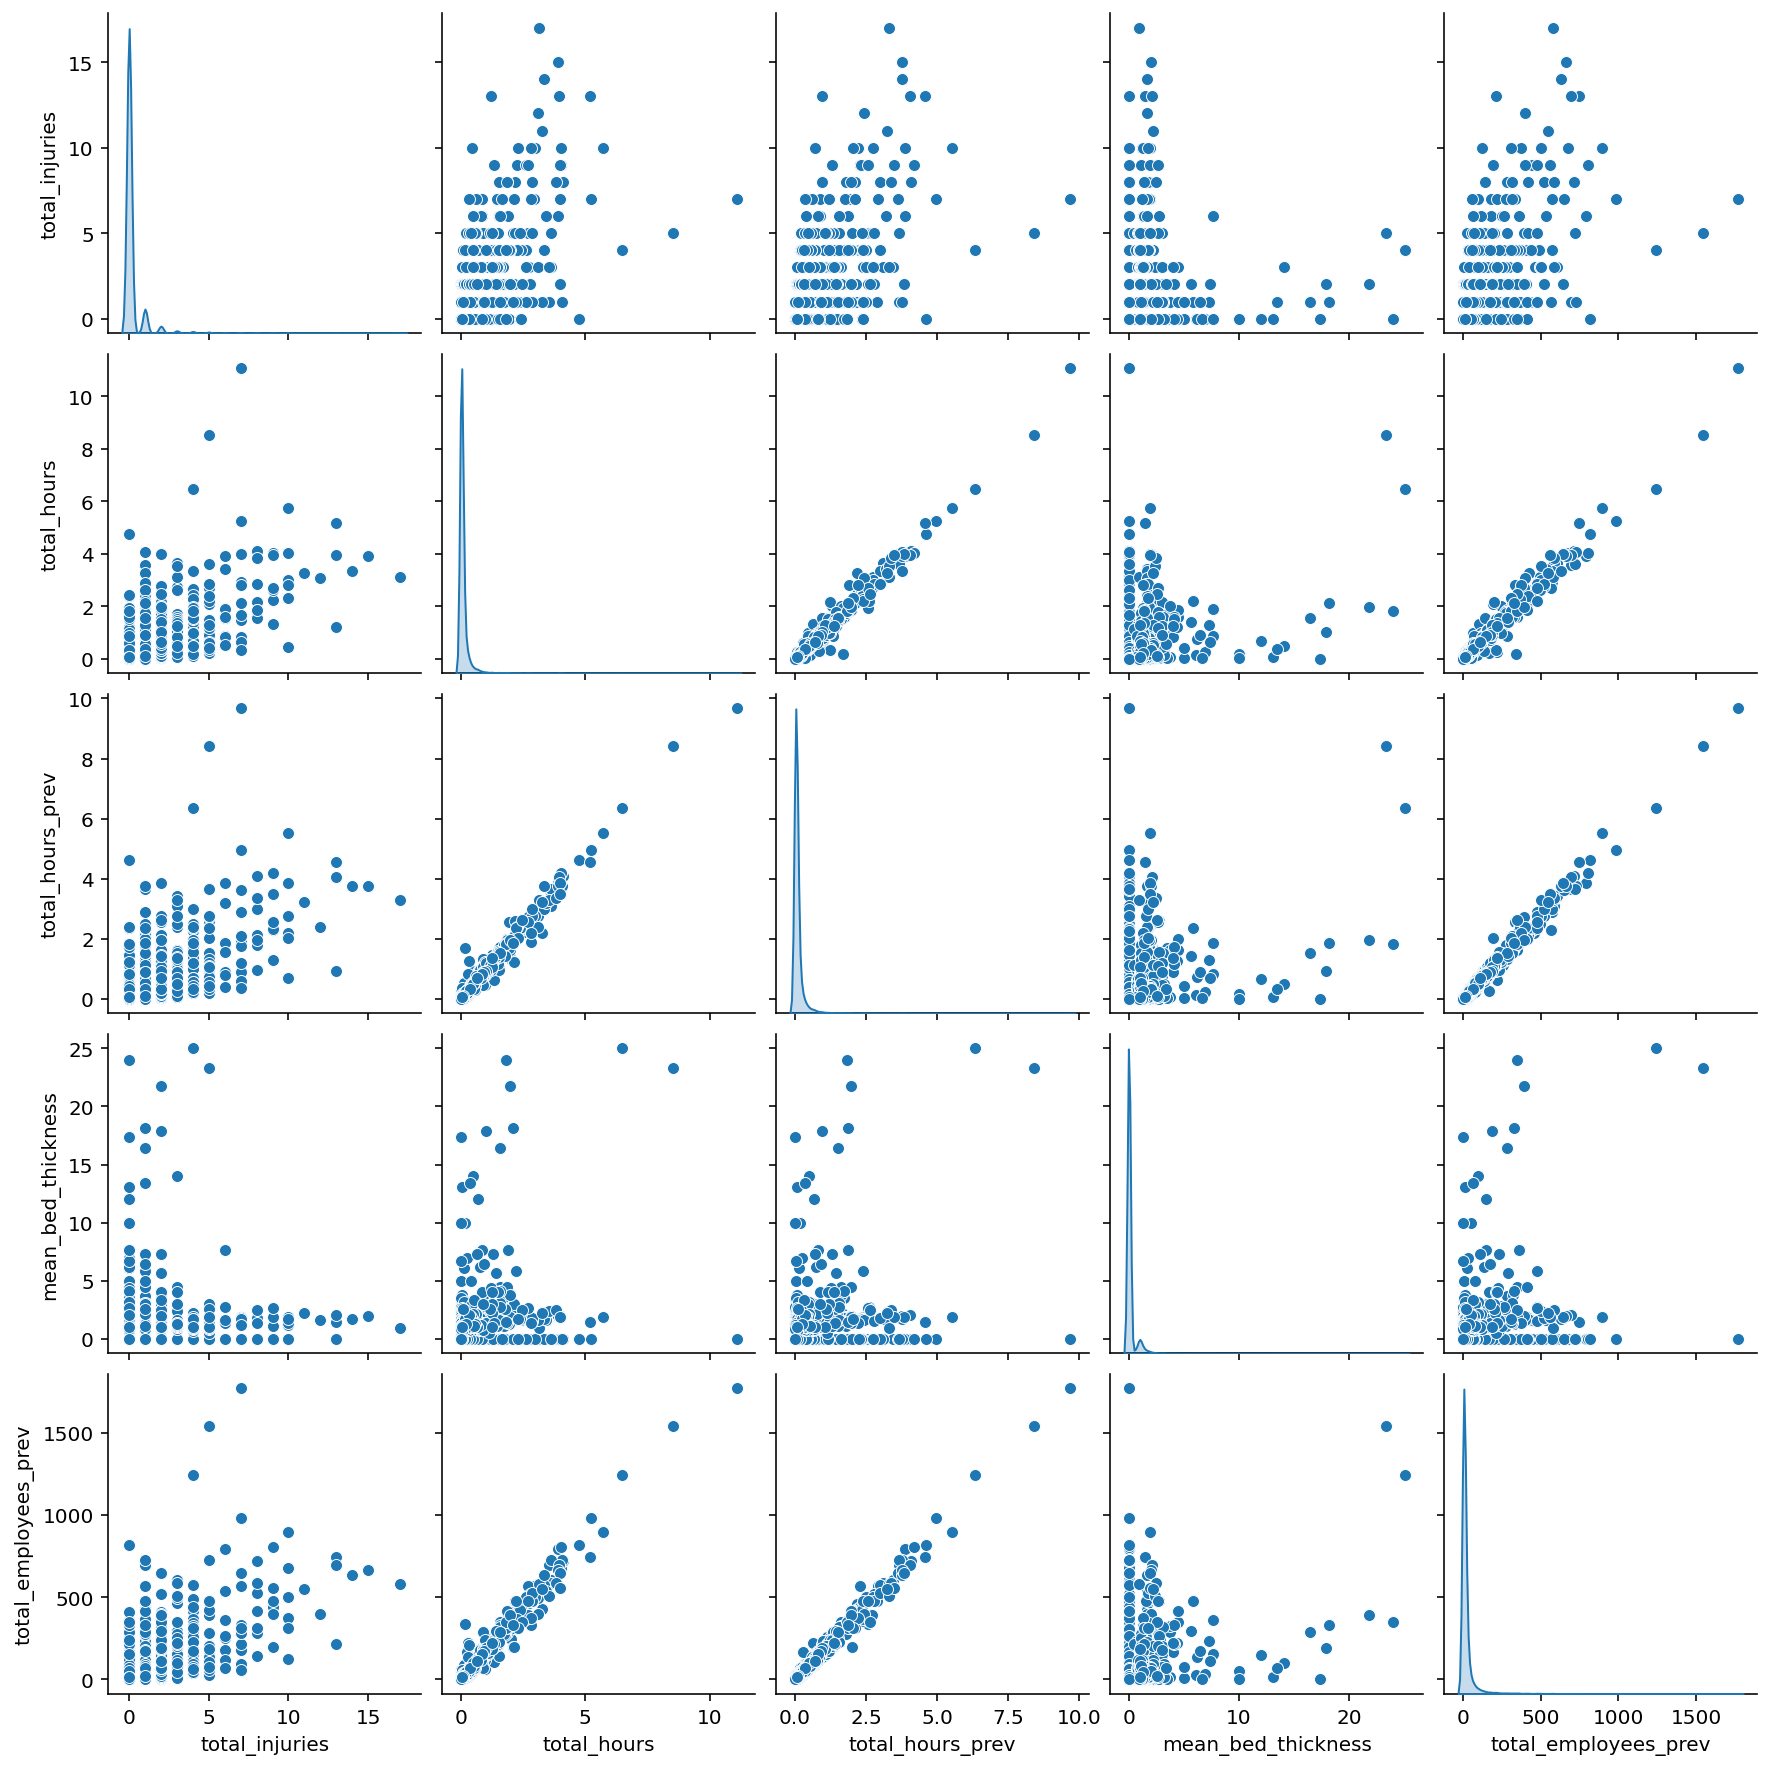

In [314]:
 sns.pairplot(data_set[["total_injuries","total_hours","total_hours_prev",'central_appalachia','mean_bed_thickness','total_employees_prev']], diag_kind="kde")

In [336]:
data_set['central_appalachia'].value_counts()
data_set['total_injuries'].value_counts()
#data_set['central_appalachia']=data_set['central_appalachia'].replace('yes',1.00)
data_set['central_appalachia']=(data_set['central_appalachia']=='yes')*1.00

data_set['mine_type']=(data_set['mine_type']=='C')*1.00
data_set['east']=(data_set['east']=='yes')*1.00
#data_set['east']=data_set['east'].replace('yes',1.0)
#data_set['east']=data_set['east'].replace('no',-1.0)
data_set.head(50)


,total_injuries,total_hours,total_hours_prev,central_appalachia,inspection_rate_prev,total_injuries_prev,traum_injuries_prev,accidents_rate_prev,onsite_hours_prev,mine_type,mean_bed_thickness,east,total_employees_prev
0,1,0.62371,0.640217,0.0,0.000556,4.00,1.75,6.244650,25.8750,0.0,0.0,1.0,108.00
1,1,0.13720,0.157330,0.0,0.001114,0.75,0.50,4.788316,7.8750,0.0,0.0,1.0,26.75
2,0,0.06074,0.062967,0.0,0.001940,0.00,0.00,0.000000,7.1875,0.0,0.0,1.0,12.00
3,1,0.26570,0.260943,0.0,0.000445,1.50,0.75,5.647860,7.8125,0.0,0.0,1.0,39.50
4,0,0.07968,0.092463,0.0,0.002394,0.00,0.00,0.000000,16.8125,0.0,0.0,1.0,19.25
5,0,0.06317,0.056358,0.0,0.002193,0.25,0.00,3.929582,8.7500,0.0,0.0,1.0,13.50
6,0,1.12103,1.240180,0.0,0.000467,3.00,1.25,2.414501,42.5625,0.0,0.0,1.0,231.25
7,0,0.04261,0.053908,0.0,0.000000,0.00,0.00,0.000000,0.0000,0.0,0.0,1.0,8.25
8,0,0.08894,0.070625,0.0,0.000000,0.00,0.00,0.000000,0.0000,0.0,0.0,1.0,13.75
9,0,0.34644,0.366757,0.0,0.001271,2.50,0.75,7.021405,33.6875,0.0,0.0,1.0,75.25


In [337]:
data_set['central_appalachia'].sum()

1545.0

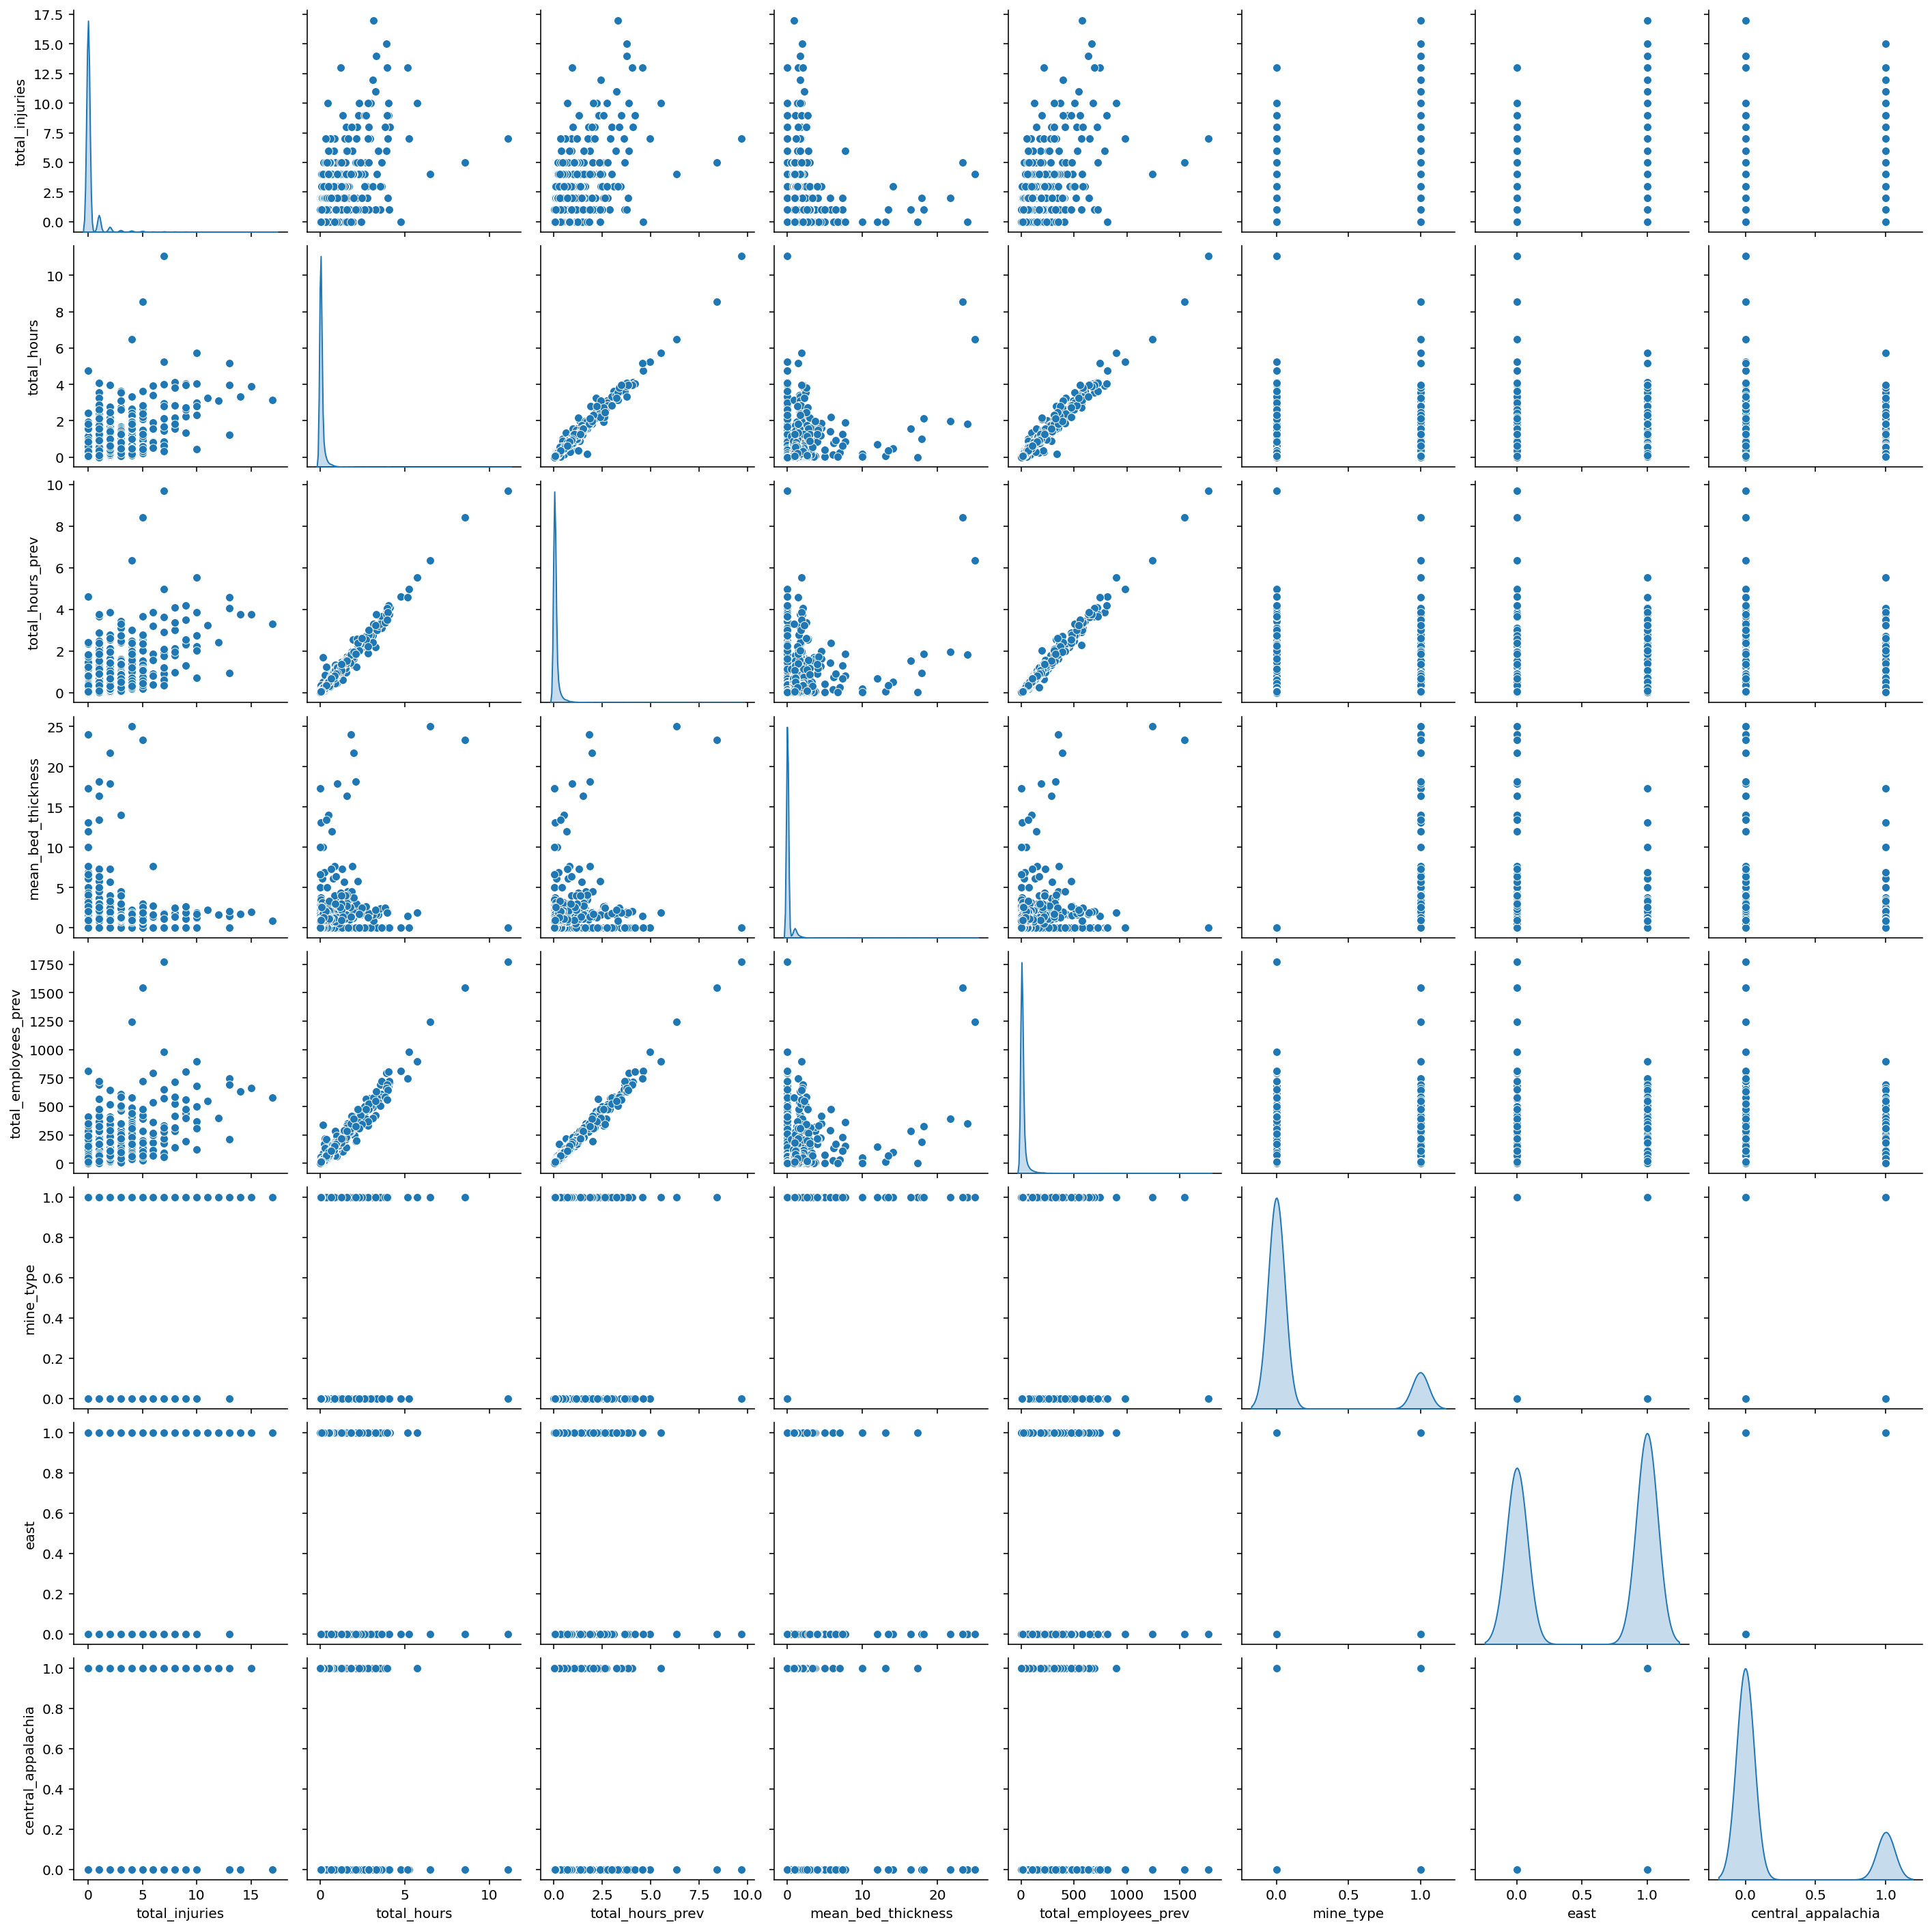

In [340]:
 sns.pairplot(data_set[['total_injuries','total_hours','total_hours_prev','mean_bed_thickness','total_employees_prev','mine_type','east','central_appalachia']], diag_kind="kde")

In [341]:
test_data=data_set.pop('total_injuries')
x_train,x_test,y_train,y_test=train_test_split(data_set,test_data,test_size=0.2)
print(y_train.shape)
y_test.shape

(6735,)


(1684,)

In [342]:
x_train=preprocessing.scale(x_train)
x_test=preprocessing.scale(x_test)
print(x_train.shape)
#y_train.value_counts()
y_train.value_counts()


(6735, 12)


0     5983
1      468
2      139
3       47
4       35
5       24
7        9
8        7
10       6
6        6
9        4
13       3
11       1
14       1
17       1
12       1
Name: total_injuries, dtype: int64

In [345]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
strategy = {0:5987, 1:1000, 2:500, 3:200, 4:100, 5:50,6:10,7:10}
strategy2 = {0:600,1:300}
y = LabelEncoder().fit_transform(y_train);
nm=NearMiss(random_state=42,ratio=strategy2,)
oversample = SMOTE(sampling_strategy=strategy)  
#X_under,Y_under=nm.fit_sample(x_train,y)
X_over, Y_over = oversample.fit_resample(x_train,y)
#X_under.shape,Y_under.shape
X_over.shape,Y_over.shape

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5987) in class 0 will be larger than the number of samples in the majority class (class #0 -> 5983)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWa

((7881, 12), (7881,))

Text(0, 0.5, 'Occurance')

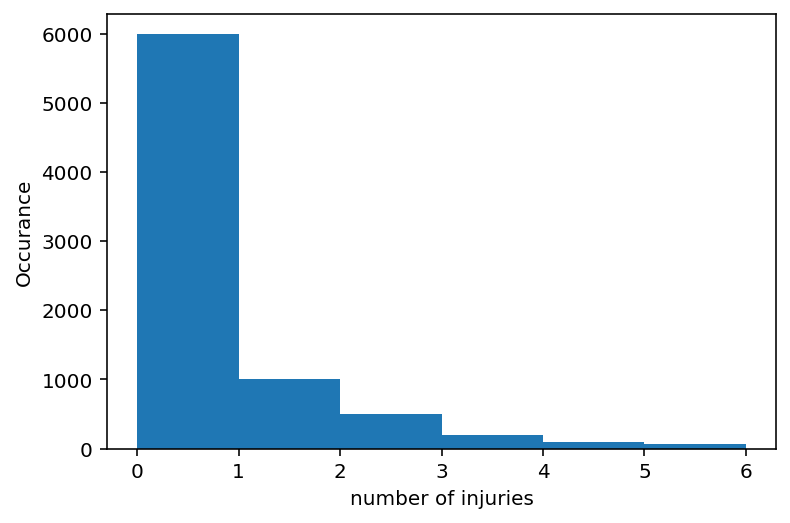

In [346]:
import numpy as np
X_over.shape,Y_over.shape
plt.hist(Y_over,[0,1,2,3,4,5,6])

#plt.hist(y_test,[0,1,2,3,4,5,6])
plt.ylim(0,)
plt.xlabel('number of injuries')
plt.ylabel('Occurance')

Epoch 00040: early stopping


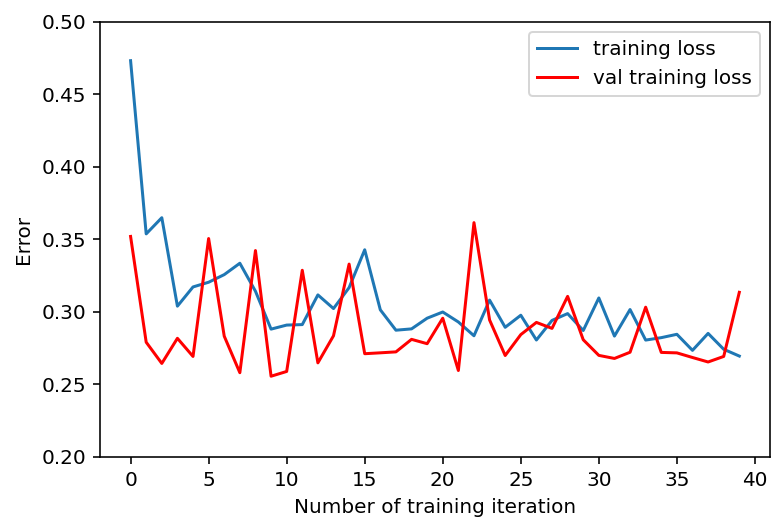

In [361]:
LR = [0.01]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(10, input_shape=(12,),activation='relu'))
    model.add(Dense(5, input_shape=(12,)))
    
    model.add(Dense(1,))
    
    #Compiles model
    model.compile(Adam(lr=i), 'mean_squared_error')
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

    #Fits model
    history = model.fit(x_train,y_train, epochs = 100, validation_split = 0.2,verbose = 0,callbacks=[earlystopper])
    history_dict=history.history
    loss_values = history_dict['loss']

    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')
    plt.xlabel("Number of training iteration")
    plt.ylabel("Error")
    plt.legend()
    #plt.xlim(0, 6000)
    plt.ylim(0.2,0.5)
    
    

In [387]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.639
The R2 score on the Test set is:	0.466


Text(0, 0.5, 'PREDICTED INJURIES')

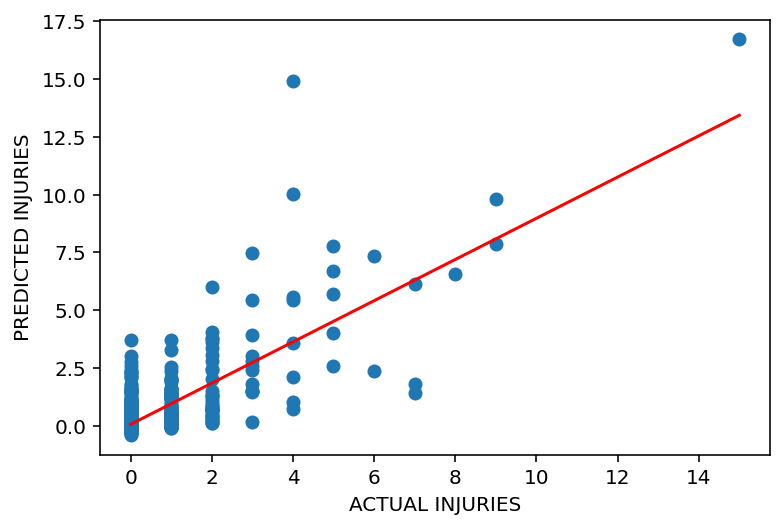

In [386]:
plt.scatter(y_test,y_test_pred)
y=y_test_pred.flatten()

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y, 1))(np.unique(y_test)),color='red')
plt.xlabel("ACTUAL INJURIES")
plt.ylabel("PREDICTED INJURIES")